In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import sklearn.metrics as metrics 
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:

with open('Dating_app_feat_eng.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   genderLooking           4008 non-null   category
 1   age                     4008 non-null   int64   
 2   name                    4008 non-null   category
 3   counts_details          4008 non-null   float64 
 4   counts_pictures         4008 non-null   int64   
 5   counts_profileVisits    4008 non-null   int64   
 6   counts_kisses           4008 non-null   int64   
 7   counts_fans             4008 non-null   float64 
 8   counts_g                4008 non-null   category
 9   flirtInterests_chat     4008 non-null   int64   
 10  flirtInterests_friends  4008 non-null   int64   
 11  flirtInterests_date     4008 non-null   int64   
 12  country                 4008 non-null   category
 13  city 

In [4]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res

In [5]:
df.head()

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_de,lang_it,lang_es,lang_pt,isVerified,shareProfileEnabled,hasBirthday,crypt,lastOnlineday,lastOnlinemonth
userId,,,,,,,,,,,,,,,,,,,,,
4e3842f79b70e7ea57000064,1,25,2078,1.00,4,8279,239,0.0,3.0,1,...,1,0,0,0,0,1.0,0,0.0,25,4
4e3d34bf5d2bce7b160006a3,1,22,2202,0.85,5,663,13,0.0,0.0,1,...,1,1,0,0,0,1.0,0,0.0,26,4
4ec96c090dc82cb25d00000a,1,21,931,0.00,4,1369,88,0.0,2.0,0,...,0,0,0,0,0,1.0,0,0.0,4,6
4eef8b81ebf2c8f64000000c,3,20,1470,0.12,3,22187,1015,2.0,3.0,1,...,0,0,0,0,0,1.0,0,0.0,4,7
4ef3cc5aa9d0b3d07d000017,1,21,2608,0.15,12,35262,1413,9.0,12.0,1,...,1,0,0,0,0,1.0,0,0.0,4,6


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

In [7]:
X = df.drop(columns='counts_profileVisits')
y=df['counts_profileVisits']


In [8]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)

pred1_pos = np.maximum(pred1, 0)

In [9]:
regressionMetrics(y, pred1_pos)

{'MSE': 8679632.398608357,
 'RMSE': 2946.1215858494975,
 'MAE': 1481.8930751973467,
 'RMSLE': 1.7648518458213658}

In [10]:
models_list = pd.DataFrame()
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred1_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852


<AxesSubplot:xlabel='counts_profileVisits'>

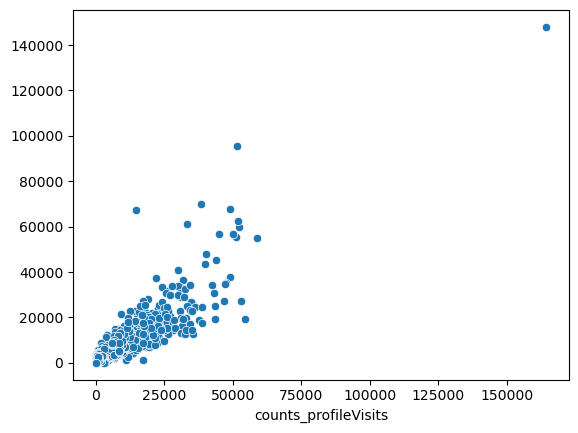

In [11]:
sns.scatterplot(x=y, y=pred1_pos)

In [12]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [13]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113


In [14]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [15]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933


In [16]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [17]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933


In [18]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [19]:
pred5 = mod5.predict(X)
pred5_pos= np.maximum(pred5, 0)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred5_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272


In [20]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

In [21]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035


In [22]:
mod7= xgb.XGBRegressor(enable_categorical=True)
mod7.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
pred7 = mod7.predict(X)
pred7_pos= np.maximum(pred7, 0)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred7_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035
6,XGB,1.665578e+02,12.905729,4.580172,0.160272


In [24]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
6,XGB,1.665578e+02,12.905729,4.580172,0.160272
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035


In [25]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [27]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.1514200694627081


In [ ]:
grid_search = GridSearchCV(estimator=mod7, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


In [ ]:
print("Best Score (RMSLE):", grid_search.best_score_)

In [ ]:
pred8 = grid_search.predict(X)
model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred8)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list